In [ ]:
# 데이터 구성 : Series, DataFrame
import pandas as pd
import pandas_datareader.data as web

# 행렬 연산
import numpy as np

# 데이터 시각화
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Seaborn(SNS)를 사용한 파이썬 데이터 시각화
import seaborn as sns

# 날짜 데이터 생성
from datetime import datetime

# 선형 회귀분석 (절편(intercept) 추가)
import statsmodels.api as sm

# 자기상관 함수, 부분 자기상관 함수
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ARIMA
from statsmodels.tsa.arima_model import ARIMA

# 한글 폰트 적용
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False

# minmaxscaler 함수 정의
def minmaxscaler(x):
  return (x - x.min()) / (x.max() - x.min())

# 글꼴 꺠짐 방지
path = "c:/Windows/Fonts/malgun.ttf"
import platform
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname = path).get_name()
    rc('font', family = font_name)
else:
    print('Unknown system... sorry~~~~')    

plt.rcParams['axes.unicode_minus'] = False  

Unknown system... sorry~~~~


In [ ]:
# 나눔 바른 고딕 글꼴 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [ ]:
# 나눔 바른 고딕 글꼴 적용
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

## 데이터 불러오기 및 살펴보기

In [ ]:
# 데이터 구성하기
df_sales = pd.read_csv('/content/sample_data/Sales_data-전처리(최종).csv', encoding = 'euc-kr')
df_sales.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,주문번호,구매일,배송시작일,배송완료일,배송리드타임,구매시월령(수정),고객번호,구매금액,결제금액,물품대분류,상품명
0,20200806162031-34198174203,2020-08-07,2020-08-08,2020-08-10,2,31.0,201901130758792,3000,3000,체험팩,맘큐 허그박스
1,20200806163134-45961790432,2020-08-07,2020-08-08,2020-08-12,4,14.0,201901140759534,42900,22076,팬티,2020 하기스 매직팬티 컴포트 썸머 4단계 공용 96매(팬티형)
2,20200806225722-70597181454,2020-08-07,2020-08-08,2020-08-11,3,30.0,201901140759701,11130,9400,SKC,그린핑거 힘센보습 울트라 크리미오일 180ml (EA)
3,20200806170653-47561291568,2020-08-07,2020-08-08,2020-08-10,2,27.0,201901150760795,11250,11100,FMC,크리넥스 비말차단용 스타일마스크 화이트 엠보 소형 3P (EA)
4,20200806190855-39842441181,2020-08-07,2020-08-08,2020-08-12,4,18.0,201901190768109,11310,8580,SKC,그린핑거 촉촉한 자연보습 워시 320ml (EA)


In [ ]:
# 물품대분류 컬럼을 선택합니다.
# 컬럼의 값과 조건을 비교합니다.
# 그 결과를 새로운 변수에 할당합니다.
is_기저귀 = df_sales['물품대분류'] == '기저귀'

# 조건를 충족하는 데이터를 필터링하여 새로운 변수에 저장합니다.
diaper = df_sales[is_기저귀]

# 결과를 출력합니다.
diaper

,주문번호,구매일,배송시작일,배송완료일,배송리드타임,구매시월령(수정),고객번호,구매금액,결제금액,물품대분류,상품명
74,20200806170623-57766681524,2020-08-07,2020-08-08,2020-08-10,2,10.0,201910291022195,0,0,기저귀,하기스 NEW 네이처메이드 썸머 3단계 공용 120매(밴드형) X 2
81,20200806225413-76951724396,2020-08-07,2020-08-08,2020-08-11,3,8.0,201912161045437,43400,27286,기저귀,NEW 하기스 맥스드라이 4단계 공용 108매(밴드형)
139,20200806095925-11579590487,2020-08-06,2020-08-07,2020-08-09,2,10.0,201904150871053,49900,21662,기저귀,하기스 NEW 네이처메이드 썸머 4단계 공용 96매(밴드형)
141,20200805150856-86258244517,2020-08-06,2020-08-07,2020-08-09,2,NaN,201904160872145,31600,16398,기저귀,NEW 하기스 네이처메이드 이른둥이기저귀 중형 150매(밴드형)
156,20200806123121-64865176960,2020-08-06,2020-08-07,2020-08-09,2,10.0,201905260902236,43400,25810,기저귀,NEW 하기스 맥스드라이 3단계 공용 132매(밴드형)
...,...,...,...,...,...,...,...,...,...,...,...
199991,201901011864753,2019-01-01,2019-01-02,2019-01-05,3,2.0,201901010750196,104640,71344,기저귀,하기스 네이처메이드 2단계 여아 156매(밴드형)
199992,201901011864758,2019-01-01,2019-01-02,2019-01-04,2,0.0,201901010750197,129000,129000,기저귀,스마트 프리미엄 멤버십 가입선물
199994,201901011864858,2019-01-01,2019-01-02,2019-01-04,2,1.0,201901010750246,15440,7642,기저귀,[신규회원 한정특가] 하기스 맥스드라이 2단계 공용 52매(밴드형)
199997,201901011864927,2019-01-01,2019-01-02,2019-01-04,2,9.0,201901010750279,50640,35289,기저귀,하기스 에어솔솔 기저귀 4단계 공용 120매(밴드형)


In [ ]:
# 물품대분류 컬럼을 선택합니다.
# 컬럼의 값과 조건을 비교합니다.
# 그 결과를 새로운 변수에 할당합니다.
is_팬티 = df_sales['물품대분류'] == '팬티'

# 조건를 충족하는 데이터를 필터링하여 새로운 변수에 저장합니다.
underwear = df_sales[is_팬티]

# 결과를 출력합니다.
underwear

,주문번호,구매일,배송시작일,배송완료일,배송리드타임,구매시월령(수정),고객번호,구매금액,결제금액,물품대분류,상품명
1,20200806163134-45961790432,2020-08-07,2020-08-08,2020-08-12,4,14.0,201901140759534,42900,22076,팬티,2020 하기스 매직팬티 컴포트 썸머 4단계 공용 96매(팬티형)
6,20200806170723-64780905408,2020-08-07,2020-08-08,2020-08-11,3,21.0,201901240773703,49900,24080,팬티,하기스 NEW 네이처메이드 썸머팬티 5단계 공용 68매(팬티형)
10,20200806153323-42429446932,2020-08-07,2020-08-08,2020-08-10,2,20.0,201902070790944,42900,21868,팬티,2020 하기스 매직팬티 컴포트 썸머 4단계 공용 96매(팬티형)
11,20200806172632-49825796745,2020-08-07,2020-08-08,2020-08-10,2,18.0,201902110793548,50400,28262,팬티,NEW 하기스 네이처메이드 팬티 4단계 여아 96매(팬티형)
14,20200806205302-91068759803,2020-08-07,2020-08-08,2020-08-10,2,28.0,201902140799451,48900,21224,팬티,NEW 하기스 네이처메이드 1단계 공용 186매(밴드형)
...,...,...,...,...,...,...,...,...,...,...,...
199951,201812311861979,2019-01-01,2019-01-02,2019-01-05,3,22.0,201812310749820,53920,36769,팬티,하기스 네이처메이드 팬티 5단계 여아 80매(팬티형)
199968,201812311863220,2019-01-01,2019-01-02,2019-01-04,2,23.0,201812310749977,47360,30066,팬티,하기스 에어솔솔 팬티 5단계 남아용 80매(팬티형)
199971,201812311863500,2019-01-01,2019-01-02,2019-01-04,2,8.0,201812310750007,52160,32408,팬티,하기스 보송보송팬티 4단계 공용 124매(팬티형)
199982,201901011864201,2019-01-01,2019-01-02,2019-01-06,4,35.0,201901010750089,74560,43825,팬티,하기스 매직핏팬티 5단계 남아 124매(팬티형)


In [ ]:
# 물품대분류 컬럼을 선택합니다.
# 컬럼의 값과 조건을 비교합니다.
# 그 결과를 새로운 변수에 할당합니다.
is_더블하트 = df_sales['물품대분류'] == '더블하트'

# 조건를 충족하는 데이터를 필터링하여 새로운 변수에 저장합니다.
feedingbottle = df_sales[is_더블하트]

# 결과를 출력합니다.
feedingbottle

,주문번호,구매일,배송시작일,배송완료일,배송리드타임,구매시월령(수정),고객번호,구매금액,결제금액,물품대분류,상품명
28,20200806164723-25654012432,2020-08-07,2020-08-08,2020-08-11,3,1.0,201903170842279,10320,9690,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입) (EA)
36,20200806153928-39176662513,2020-08-07,2020-08-08,2020-08-10,2,8.0,201905170895574,37240,26143,더블하트,더블하트 SofTouch 모유실감 노꼭지 트윈팩 240ml(토이) (EA)
42,20200806151307-16725737423,2020-08-07,2020-08-08,2020-08-12,4,11.0,201906030908280,30960,30110,더블하트,더블하트 SofTouch 모유실감 젖꼭지 LL (2입) (EA)
53,20200806211330-89480953628,2020-08-07,2020-08-08,2020-08-10,2,10.0,201907280948903,5010,4950,더블하트,더블하트 SofTouch 모유실감 젖병 핸들(옐로우) (EA)
63,20200806194332-46933013532,2020-08-07,2020-08-08,2020-08-10,2,5.0,201910101002451,4400,3710,더블하트,더블하트 유치브러쉬 1단계 (1입) (EA)
...,...,...,...,...,...,...,...,...,...,...,...
199958,201812311862420,2019-01-01,2019-01-02,2019-01-04,2,0.0,201812310749875,39200,31046,더블하트,더블하트 SofTouch 모유실감 PPSU 젖병 노꼭지 트윈팩 240ml(애니멀)
199962,201812311862702,2019-01-01,2019-01-02,2019-01-05,3,8.0,201812310749915,25800,16314,더블하트,더블하트 SofTouch 모유실감 젖꼭지 LL (2입)
199969,201812311863428,2019-01-01,2019-01-02,2019-01-05,3,-8.0,201812310749984,25800,16314,더블하트,더블하트 SofTouch 모유실감 젖꼭지 LL (2입)
199972,201812311863454,2019-01-01,2019-01-02,2019-01-04,2,4.0,201812310750008,25800,16314,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입)


In [ ]:
df_majorsales = pd.concat([diaper, underwear, feedingbottle], axis = 0)
df_majorsales

,주문번호,구매일,배송시작일,배송완료일,배송리드타임,구매시월령(수정),고객번호,구매금액,결제금액,물품대분류,상품명
74,20200806170623-57766681524,2020-08-07,2020-08-08,2020-08-10,2,10.0,201910291022195,0,0,기저귀,하기스 NEW 네이처메이드 썸머 3단계 공용 120매(밴드형) X 2
81,20200806225413-76951724396,2020-08-07,2020-08-08,2020-08-11,3,8.0,201912161045437,43400,27286,기저귀,NEW 하기스 맥스드라이 4단계 공용 108매(밴드형)
139,20200806095925-11579590487,2020-08-06,2020-08-07,2020-08-09,2,10.0,201904150871053,49900,21662,기저귀,하기스 NEW 네이처메이드 썸머 4단계 공용 96매(밴드형)
141,20200805150856-86258244517,2020-08-06,2020-08-07,2020-08-09,2,NaN,201904160872145,31600,16398,기저귀,NEW 하기스 네이처메이드 이른둥이기저귀 중형 150매(밴드형)
156,20200806123121-64865176960,2020-08-06,2020-08-07,2020-08-09,2,10.0,201905260902236,43400,25810,기저귀,NEW 하기스 맥스드라이 3단계 공용 132매(밴드형)
...,...,...,...,...,...,...,...,...,...,...,...
199958,201812311862420,2019-01-01,2019-01-02,2019-01-04,2,0.0,201812310749875,39200,31046,더블하트,더블하트 SofTouch 모유실감 PPSU 젖병 노꼭지 트윈팩 240ml(애니멀)
199962,201812311862702,2019-01-01,2019-01-02,2019-01-05,3,8.0,201812310749915,25800,16314,더블하트,더블하트 SofTouch 모유실감 젖꼭지 LL (2입)
199969,201812311863428,2019-01-01,2019-01-02,2019-01-05,3,-8.0,201812310749984,25800,16314,더블하트,더블하트 SofTouch 모유실감 젖꼭지 LL (2입)
199972,201812311863454,2019-01-01,2019-01-02,2019-01-04,2,4.0,201812310750008,25800,16314,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입)


In [ ]:
df_majorsales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100358 entries, 74 to 199983
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   주문번호       100358 non-null  object 
 1   구매일        100358 non-null  object 
 2   배송시작일      100358 non-null  object 
 3   배송완료일      100358 non-null  object 
 4   배송리드타임     100358 non-null  int64  
 5   구매시월령(수정)  90767 non-null   float64
 6   고객번호       100358 non-null  object 
 7   구매금액       100358 non-null  int64  
 8   결제금액       100358 non-null  int64  
 9   물품대분류      100358 non-null  object 
 10  상품명        100358 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 9.2+ MB


In [ ]:
df_majorsales.describe()

,배송리드타임,구매시월령(수정),구매금액,결제금액
count,100358.000000,90767.000000,100358.000000,100358.000000
mean,2.369427,9.452235,48613.008928,33819.305885
std,0.608640,23.505959,32551.396573,22901.228291
min,2.000000,-10.000000,0.000000,-35166.000000
25%,2.000000,2.000000,25800.000000,15919.000000
50%,2.000000,5.000000,50640.000000,34309.000000
75%,3.000000,10.000000,54480.000000,41748.000000
max,4.000000,566.000000,598000.000000,493020.000000


## 데이터 전처리

In [ ]:
data = df_majorsales.copy()

# 1. 구매일 변수 dateime 타입으로 변환하기
data["구매일"] = pd.to_datetime(data["구매일"])
data = data.sort_values("구매일")

# 2. 배송시작일 변수 dateime 타입으로 변환하기
data["배송시작일"] = pd.to_datetime(data["배송시작일"])
data = data.sort_values("배송시작일")

# 3. 배송완료일 변수 dateime 타입으로 변환하기
data["배송완료일"] = pd.to_datetime(data["배송완료일"])
data = data.sort_values("배송완료일")

# 4. 배송리드타임, 구매시월령(수정), 구매금액, 결제금액
data["배송리드타임"] = minmaxscaler(data["배송리드타임"])
data["구매시월령(수정)"] = minmaxscaler(data["구매시월령(수정)"])
data["구매금액"] = minmaxscaler(data["구매금액"])
data["결제금액"] = minmaxscaler(data["결제금액"])
data.describe()

,배송리드타임,구매시월령(수정),구매금액,결제금액
count,100358.000000,90767.000000,100358.000000,100358.000000
mean,0.184714,0.033771,0.081293,0.130608
std,0.304320,0.040809,0.054434,0.043358
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.020833,0.043144,0.096718
50%,0.000000,0.026042,0.084682,0.131535
75%,0.500000,0.034722,0.091104,0.145619
max,1.000000,1.000000,1.000000,1.000000


In [ ]:
df_majorsales_sort_index = df_majorsales.sort_index(ascending=True)
df_majorsales_sort_index

,주문번호,구매일,배송시작일,배송완료일,배송리드타임,구매시월령(수정),고객번호,구매금액,결제금액,물품대분류,상품명
1,20200806163134-45961790432,2020-08-07,2020-08-08,2020-08-12,4,14.0,201901140759534,42900,22076,팬티,2020 하기스 매직팬티 컴포트 썸머 4단계 공용 96매(팬티형)
6,20200806170723-64780905408,2020-08-07,2020-08-08,2020-08-11,3,21.0,201901240773703,49900,24080,팬티,하기스 NEW 네이처메이드 썸머팬티 5단계 공용 68매(팬티형)
10,20200806153323-42429446932,2020-08-07,2020-08-08,2020-08-10,2,20.0,201902070790944,42900,21868,팬티,2020 하기스 매직팬티 컴포트 썸머 4단계 공용 96매(팬티형)
11,20200806172632-49825796745,2020-08-07,2020-08-08,2020-08-10,2,18.0,201902110793548,50400,28262,팬티,NEW 하기스 네이처메이드 팬티 4단계 여아 96매(팬티형)
14,20200806205302-91068759803,2020-08-07,2020-08-08,2020-08-10,2,28.0,201902140799451,48900,21224,팬티,NEW 하기스 네이처메이드 1단계 공용 186매(밴드형)
...,...,...,...,...,...,...,...,...,...,...,...
199991,201901011864753,2019-01-01,2019-01-02,2019-01-05,3,2.0,201901010750196,104640,71344,기저귀,하기스 네이처메이드 2단계 여아 156매(밴드형)
199992,201901011864758,2019-01-01,2019-01-02,2019-01-04,2,0.0,201901010750197,129000,129000,기저귀,스마트 프리미엄 멤버십 가입선물
199994,201901011864858,2019-01-01,2019-01-02,2019-01-04,2,1.0,201901010750246,15440,7642,기저귀,[신규회원 한정특가] 하기스 맥스드라이 2단계 공용 52매(밴드형)
199997,201901011864927,2019-01-01,2019-01-02,2019-01-04,2,9.0,201901010750279,50640,35289,기저귀,하기스 에어솔솔 기저귀 4단계 공용 120매(밴드형)


In [ ]:
data = df_majorsales_sort_index.copy()

# 1. 구매일 변수 dateime 타입으로 변환하기
data["구매일"] = pd.to_datetime(data["구매일"])
data = data.sort_values("구매일")

# 2. 배송시작일 변수 dateime 타입으로 변환하기
data["배송시작일"] = pd.to_datetime(data["배송시작일"])
data = data.sort_values("배송시작일")

# 3. 배송완료일 변수 dateime 타입으로 변환하기
data["배송완료일"] = pd.to_datetime(data["배송완료일"])
data = data.sort_values("배송완료일")

# 4. 배송리드타임, 구매시월령(수정), 구매금액, 결제금액
data["배송리드타임"] = minmaxscaler(data["배송리드타임"])
data["구매시월령(수정)"] = minmaxscaler(data["구매시월령(수정)"])
data["구매금액"] = minmaxscaler(data["구매금액"])
data["결제금액"] = minmaxscaler(data["결제금액"])
data.describe()

,배송리드타임,구매시월령(수정),구매금액,결제금액
count,100358.000000,90767.000000,100358.000000,100358.000000
mean,0.184714,0.033771,0.081293,0.130608
std,0.304320,0.040809,0.054434,0.043358
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.020833,0.043144,0.096718
50%,0.000000,0.026042,0.084682,0.131535
75%,0.500000,0.034722,0.091104,0.145619
max,1.000000,1.000000,1.000000,1.000000


## 시각화 자료 2

In [ ]:
df_majorsales_sort_index

,주문번호,구매일,배송시작일,배송완료일,배송리드타임,구매시월령(수정),고객번호,구매금액,결제금액,물품대분류,상품명
1,20200806163134-45961790432,2020-08-07,2020-08-08,2020-08-12,4,14.0,201901140759534,42900,22076,팬티,2020 하기스 매직팬티 컴포트 썸머 4단계 공용 96매(팬티형)
6,20200806170723-64780905408,2020-08-07,2020-08-08,2020-08-11,3,21.0,201901240773703,49900,24080,팬티,하기스 NEW 네이처메이드 썸머팬티 5단계 공용 68매(팬티형)
10,20200806153323-42429446932,2020-08-07,2020-08-08,2020-08-10,2,20.0,201902070790944,42900,21868,팬티,2020 하기스 매직팬티 컴포트 썸머 4단계 공용 96매(팬티형)
11,20200806172632-49825796745,2020-08-07,2020-08-08,2020-08-10,2,18.0,201902110793548,50400,28262,팬티,NEW 하기스 네이처메이드 팬티 4단계 여아 96매(팬티형)
14,20200806205302-91068759803,2020-08-07,2020-08-08,2020-08-10,2,28.0,201902140799451,48900,21224,팬티,NEW 하기스 네이처메이드 1단계 공용 186매(밴드형)
...,...,...,...,...,...,...,...,...,...,...,...
199991,201901011864753,2019-01-01,2019-01-02,2019-01-05,3,2.0,201901010750196,104640,71344,기저귀,하기스 네이처메이드 2단계 여아 156매(밴드형)
199992,201901011864758,2019-01-01,2019-01-02,2019-01-04,2,0.0,201901010750197,129000,129000,기저귀,스마트 프리미엄 멤버십 가입선물
199994,201901011864858,2019-01-01,2019-01-02,2019-01-04,2,1.0,201901010750246,15440,7642,기저귀,[신규회원 한정특가] 하기스 맥스드라이 2단계 공용 52매(밴드형)
199997,201901011864927,2019-01-01,2019-01-02,2019-01-04,2,9.0,201901010750279,50640,35289,기저귀,하기스 에어솔솔 기저귀 4단계 공용 120매(밴드형)


In [ ]:
df_majorsales_sort_index['배송리드타임'].describe()

count    100358.000000
mean          2.369427
std           0.608640
min           2.000000
25%           2.000000
50%           2.000000
75%           3.000000
max           4.000000
Name: 배송리드타임, dtype: float64

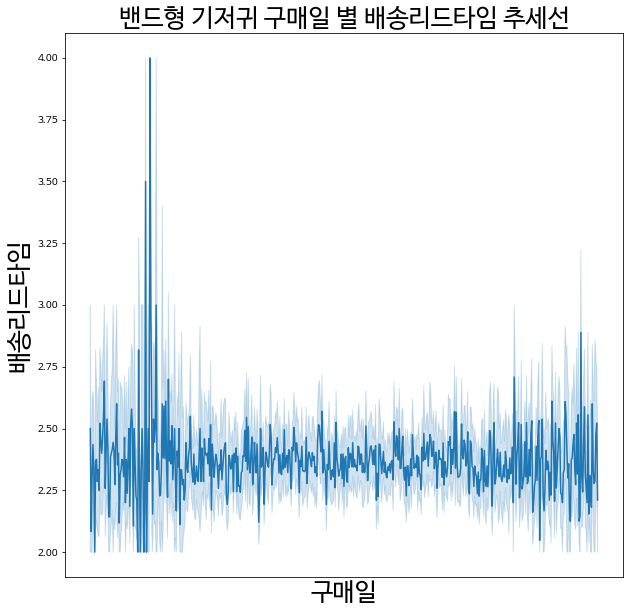

In [ ]:
plt.figure(figsize = (10,10))
plt.title('밴드형 기저귀 구매일 별 배송리드타임 추세선', fontsize=25)

plt.xlabel("구매일", fontsize=25)
plt.ylabel("배송리드타임" , fontsize=25)

ax = plt.gca()
ax.axes.xaxis.set_ticks([])
sns.lineplot(x = df_majorsales_sort_index['구매일'], y = diaper['배송리드타임'])

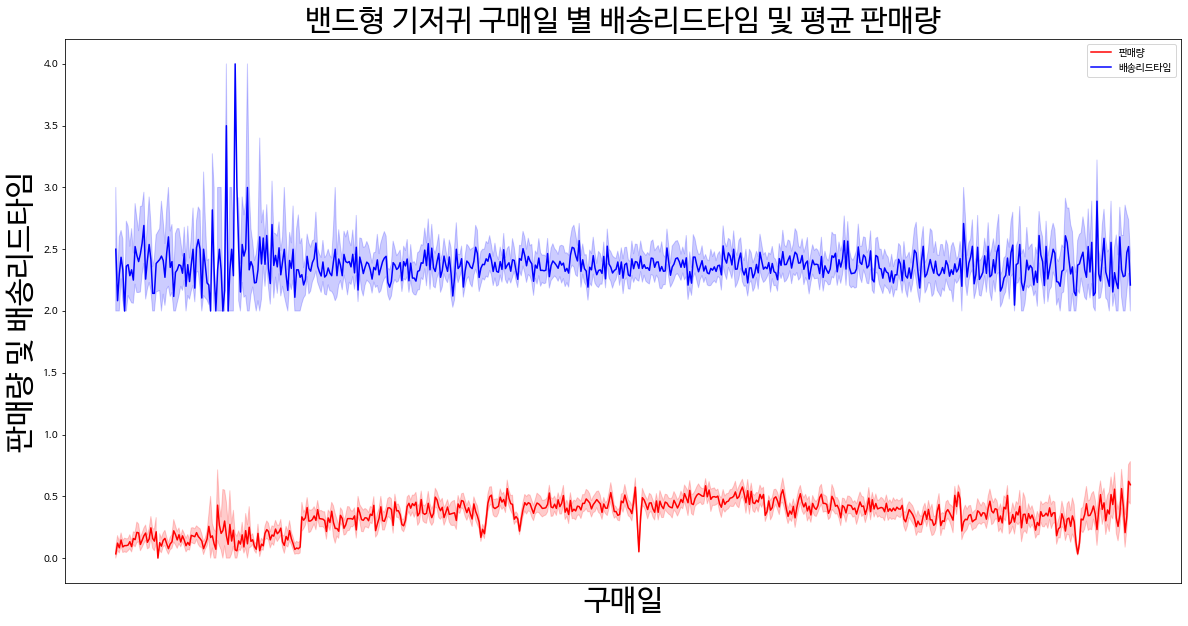

In [ ]:
plt.figure(figsize = (20,10))
a = sns.lineplot(x = df_majorsales_sort_index['구매일'], y = (df_majorsales_sort_index['물품대분류'] == '기저귀'), label='판매량', color='red', alpha = 1.0)
a = sns.lineplot(x = df_majorsales_sort_index['구매일'], y = (diaper['배송리드타임']),  label='배송리드타임', color='blue', alpha = 1.0)

a.set_xlabel('구매일', size=30)
a.set_ylabel('판매량 및 배송리드타임', size=30)

plt.xticks(rotation = 30)
plt.title('밴드형 기저귀 구매일 별 배송리드타임 및 평균 판매량', fontsize=30)
ax = plt.gca()
ax.axes.xaxis.set_ticks([])
plt.show()


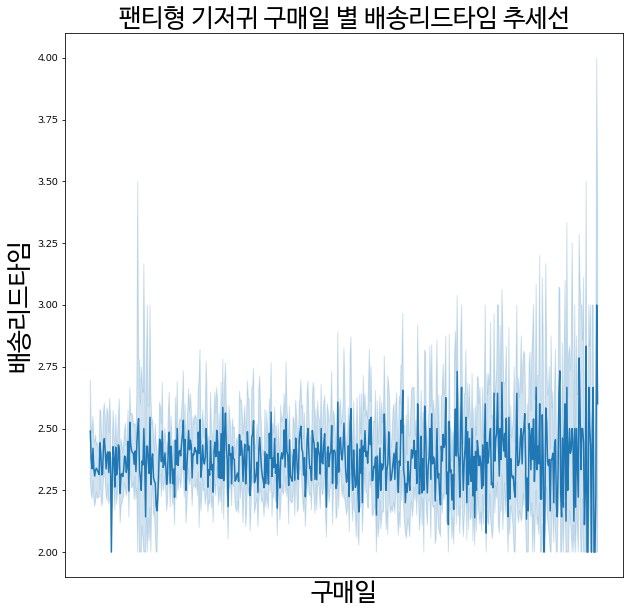

In [ ]:
plt.figure(figsize = (10,10))
plt.title('팬티형 기저귀 구매일 별 배송리드타임 추세선', fontsize=25)

plt.xlabel("구매일", fontsize=25)
plt.ylabel("배송리드타임", fontsize=25)

ax = plt.gca()
ax.axes.xaxis.set_ticks([])
sns.lineplot(x = df_majorsales_sort_index['구매일'], y = underwear['배송리드타임'])

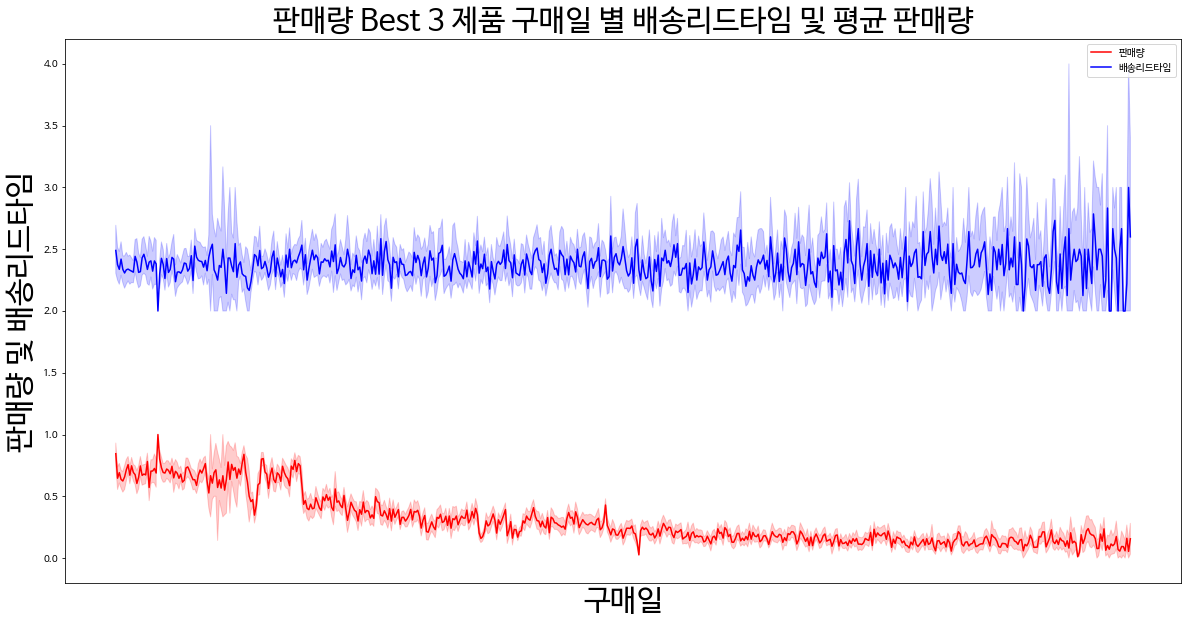

In [ ]:
plt.figure(figsize = (20,10))
b = sns.lineplot(x = df_majorsales_sort_index['구매일'], y = (df_majorsales_sort_index['물품대분류'] == '팬티'), label='판매량', color='red', alpha = 1.0)
b = sns.lineplot(x = df_majorsales_sort_index['구매일'], y = (underwear['배송리드타임']),  label='배송리드타임', color='blue', alpha = 1.0)

b.set_xlabel('구매일', size=30)
b.set_ylabel('판매량 및 배송리드타임', size=30)

plt.xticks(rotation = 30)
plt.title('판매량 Best 3 제품 구매일 별 배송리드타임 및 평균 판매량', fontsize=30)
ax = plt.gca()
ax.axes.xaxis.set_ticks([])
plt.show()

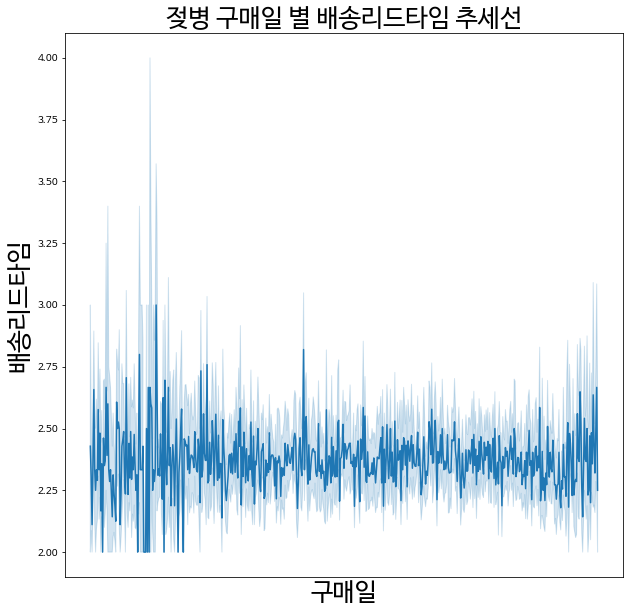

In [ ]:
plt.figure(figsize = (10,10))
plt.title('젖병 구매일 별 배송리드타임 추세선', fontsize=25)

plt.xlabel("구매일", fontsize=25)
plt.ylabel("배송리드타임", fontsize=25)

ax = plt.gca()
ax.axes.xaxis.set_ticks([])
sns.lineplot(x = df_majorsales_sort_index['구매일'], y = feedingbottle['배송리드타임'])

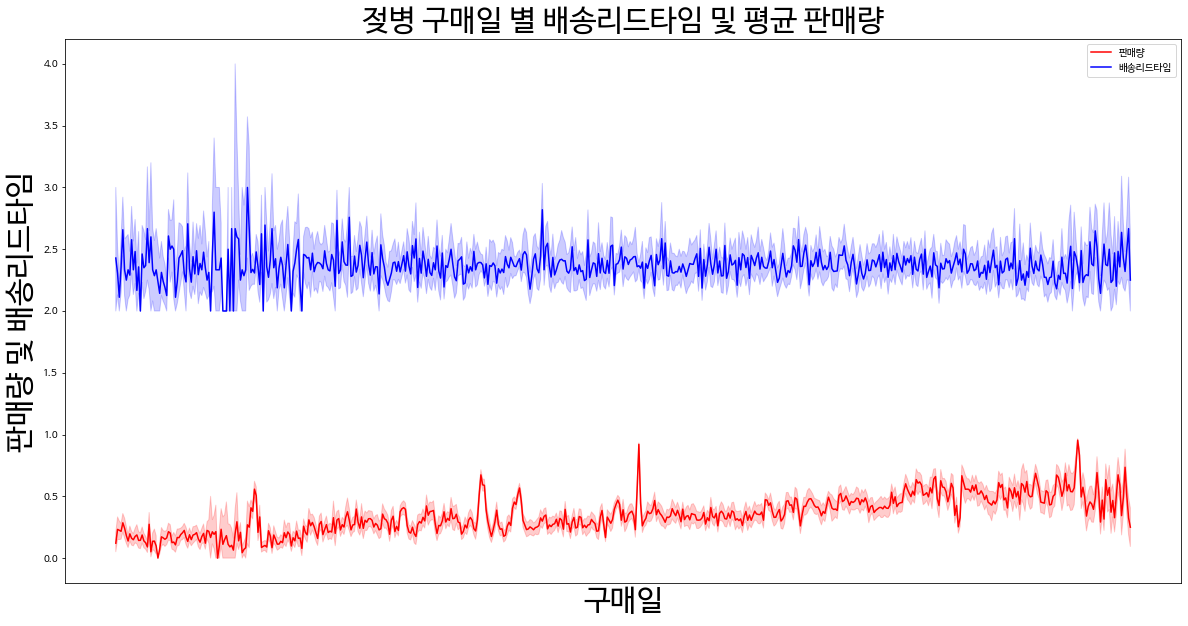

In [ ]:
plt.figure(figsize = (20,10))
c = sns.lineplot(x = df_majorsales_sort_index['구매일'], y = (df_majorsales_sort_index['물품대분류'] == '더블하트'), label='판매량', color='red', alpha = 1.0)
c = sns.lineplot(x = df_majorsales_sort_index['구매일'], y = (feedingbottle['배송리드타임']),  label='배송리드타임', color='blue', alpha = 1.0)

c.set_xlabel('구매일', size=30)
c.set_ylabel('판매량 및 배송리드타임', size=30)

plt.xticks(rotation = 20)
plt.title('젖병 구매일 별 배송리드타임 및 평균 판매량', fontsize=30)
ax = plt.gca()
ax.axes.xaxis.set_ticks([])
plt.show()

## 배송 불만족율

In [ ]:
df_majorsales_sort_index['배송리드타임']

1         4
6         3
10        2
11        2
14        2
         ..
199991    3
199992    2
199994    2
199997    2
199998    2
Name: 배송리드타임, Length: 100358, dtype: int64

(array([70182.,     0.,     0.,     0.,     0., 23277.,     0.,     0.,
            0.,  6899.]),
 array([2. , 2.2, 2.4, 2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. ]),
 <a list of 10 Patch objects>)

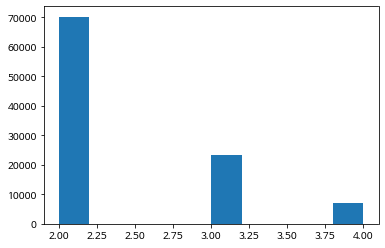

In [ ]:
plt.hist(df_majorsales_sort_index['배송리드타임'])

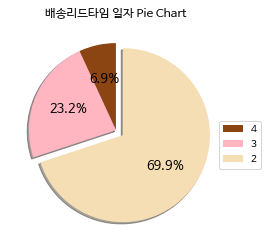

In [ ]:
import matplotlib.pyplot as plt

new=df_majorsales_sort_index['배송리드타임'].value_counts().head(3).sort_values()

colors = ['saddlebrown', 'lightpink', 'wheat']
labels=new.index
plt.pie(new,startangle = 90,explode = (0,0,0.1),shadow=True,autopct='%1.1f%%',colors=colors,textprops = {'fontsize':13})
plt.title('배송리드타임 일자 Pie Chart')
plt.legend(labels=labels, loc='lower left', bbox_to_anchor=(0.95, 0.3))

plt.savefig("배송리드타임.svg", format="svg",facecolor='#eeeeee', bbox_inches='tight')
# plt.savefig("65세 이상.png",facecolor='#eeeeee', bbox_inches='tight')

([<matplotlib.patches.Wedge at 0x7f87a653db90>,
  ...],
 [Text(1.099999998463999, 5.8130909358650596e-05, ''),
  Text(1.0999999883839906, 0.00015986000339097712, ''),
  Text(1.0999999754239798, 0.00023252364209713934, ''),
  Text(1.0999999615999687, 0.00029065454983235087, ''),
  Text(1.0999999447039555, 0.00034878545675584284, ''),
  Text(1.09999992473594, 0.0004069163627052714, ''),
  Text(1.0999998954559163, 0.00047957999666794744, ''),
  Text(1.099999861375889, 0.0005522436285379088, ''),
  Text(1.0999998306558658, 0.0006103745297996573, ''),
  Text(1.0999997879358323, 0.0006830381571036963, ''),
  Text(1.099999720063781, 0.0007847672289938356, ''),
  Text(1.0999996543997346, 0.000871963568325099, ''),
  Text(1.099999606783702, 0.0009300944582024816, ''),
  Text(1.0999995429436564, 0.0010027580700204344, ''),
  Text(1.0999994743036088, 0.0010754216774627122, ''),
  Text(1.0999994008635594, 0.0011480852802122365, ''),
  Text(1.0999993226235083, 0.0012207488779519297, ''),
  Text(1.0

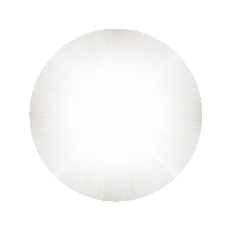

In [ ]:
# 배송 만족일자를 2일로 잡는다면 배송 불만족율의 비율을 구할수 있다.
plt.pie(df_majorsales_sort_index['배송리드타임'])

## 파레토 법칙

In [ ]:
data_deliverleadtime = df_majorsales_sort_index['배송리드타임'].value_counts()
print(data_deliverleadtime)

2    70182
3    23277
4     6899
Name: 배송리드타임, dtype: int64


In [ ]:
x = data_deliverleadtime.index
x = [str(i) for i in x]

y = data_deliverleadtime.values

In [ ]:
# 누적 비율을 보여주기 위한 값을만든다.
ratio = y / y.sum()
ratio_sum = ratio.cumsum()

[0.65 0.7  0.75 0.8  0.85 0.9  0.95 1.   1.05]


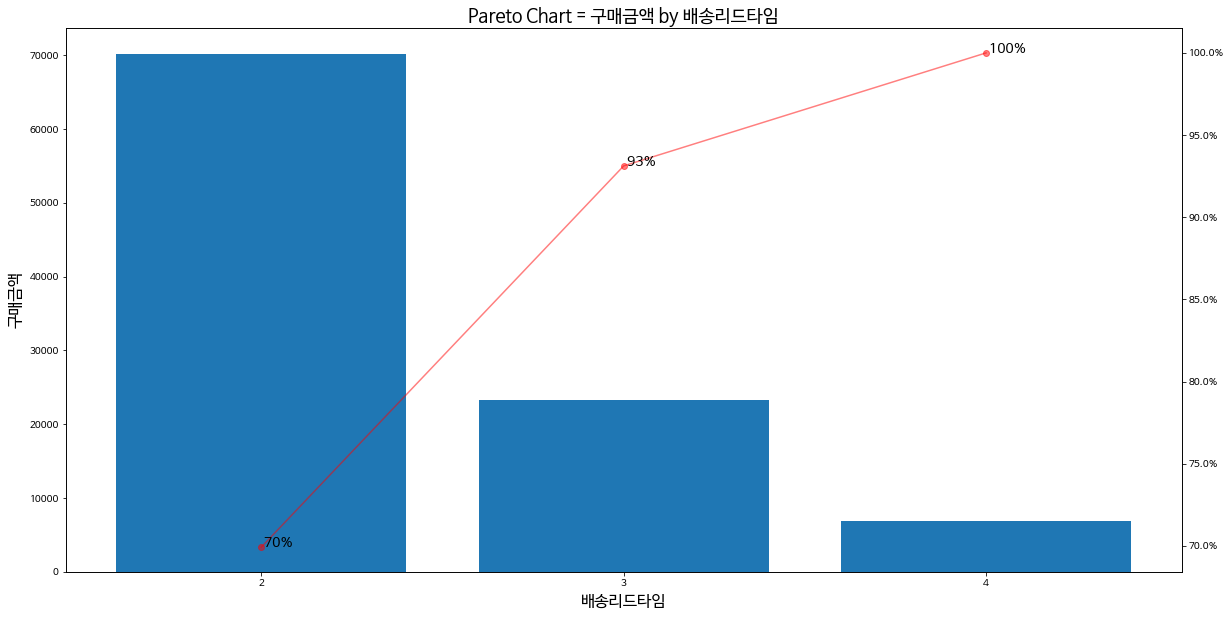

In [ ]:
# 바차트설정
fig, barChart = plt.subplots(figsize=(20,10))
barChart.bar(x,y)
lineChart = barChart.twinx()
lineChart.plot(x, ratio_sum, '-ro', alpha = 0.5)
ranges = lineChart.get_yticks()
print(ranges)
# 라인차트설정
lineChart.set_yticklabels(['{:,.1%}'. format(x) for x in ranges])
ratio_sum_percentages = ['{0: .0%}'.format(x) for x in ratio_sum]
for i ,txt in enumerate(ratio_sum_percentages):
    lineChart.annotate(txt, (x[i], ratio_sum[i]), fontsize=14)
barChart.set_xlabel('배송리드타임', fontdict={'size':16})
barChart.set_ylabel('구매금액', fontdict={'size':16})
plt.title('Pareto Chart = 구매금액 by 배송리드타임', fontsize = 18)
plt.show()

#### 파레토 분석을 통해서 배송리드타임이 짧을수록 구매금액이 크다는 것을 확인할 수 있음

## 범주형 변수 EDA 및 시각화

#### 범주형 변수 레이블 개수 확인

In [ ]:
category = data[["구매일", "배송리드타임", "구매시월령(수정)", "구매금액"]]
group_leadtime = category.groupby("배송리드타임")
group_monthtime = category.groupby("구매시월령(수정)")

print(f"배송리드타임 변수 레이블 개수 : {len(group_leadtime)}")
print(f"구매시월령(수정) 변수 레이블 개수 : {len(group_monthtime)}")

배송리드타임 변수 레이블 개수 : 3
구매시월령(수정) 변수 레이블 개수 : 319


### 배송리드타임에 따른 구매금액 시각화

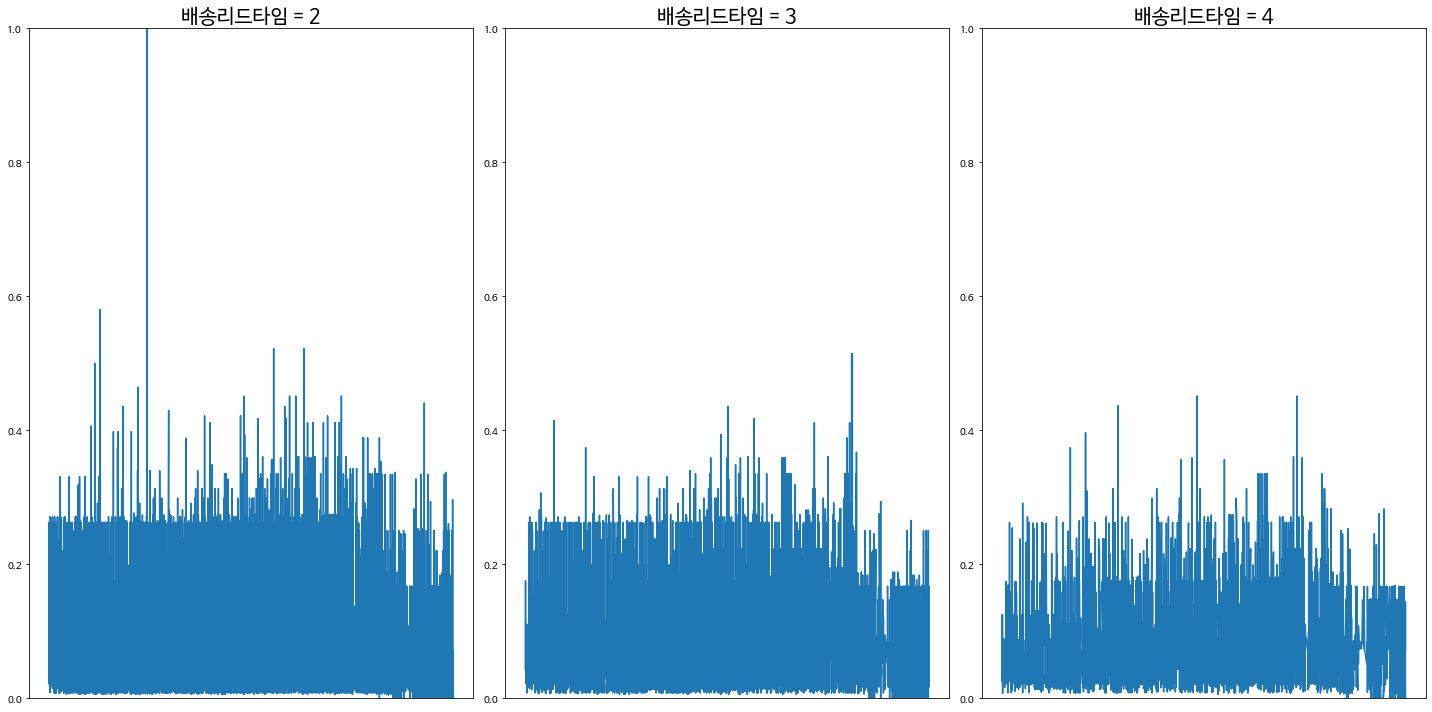

In [ ]:
fig, axes = plt.subplots(1, 3, figsize = (20, 10))
axes = axes.ravel()

for idx, element in enumerate(zip(axes, group_leadtime)):
  axis, group = element
  store, df_majorsales_sort_index = group
  df_x = df_majorsales_sort_index["구매일"]
  df_y = df_majorsales_sort_index["구매금액"]
  axis.plot(df_x, df_y)
  axis.set_ylim([0, 1])
  axis.get_xaxis().set_visible(False)
  axis.set_title(f"배송리드타임 = {idx+2}", fontsize = 20)

plt.tight_layout()
plt.show()

####주요상품인 귀저기, 팬티, 더블하트 데이터만 추출하여 배송리드타임이 각각 1일, 2일, 3일에 따른 구매금액 추이를 시각화 한 결과, 배송리드타임이 1일인 경우 비교적 많은 구매금액과 연관이 있음을 알 수 있다.
####전체 물품량 대상으로 진행했던 시각화 그래프와 주요상품의 시각화 그래프 추세가 비슷함을 알 수 있다.

### 매출 변화량이 큰 구간 찾아내기

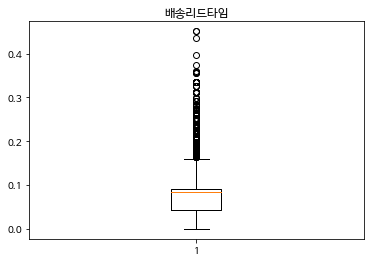

In [ ]:
# 구매금액의 boxplot
plt.boxplot(df_majorsales_sort_index["구매금액"])
plt.title("배송리드타임")
plt.show()

In [ ]:
# boxplot에서 사분위수 범위를 넘어가는 값들은 이상치로 간주되기 때문에, 사분위수 범위 밖에 있는 값들만 추출
df_desc = df_majorsales_sort_index.describe()
Q1 = df_desc.loc["25%", "구매금액"]
Q3 = df_desc.loc["75%", "구매금액"]
IQR = Q3 - Q1
upper_bound = Q3 + 1.5*IQR
lower_bound = Q1 - 1.5*IQR

# and = & , or = |
outlier = df_majorsales_sort_index[(df_majorsales_sort_index["구매금액"] > upper_bound) | (df_majorsales_sort_index["구매금액"] < lower_bound)]
outlier_date = pd.to_datetime(outlier["구매일"])
print(outlier)

              구매일  배송리드타임  구매시월령(수정)      구매금액
199578 2019-01-07     1.0   0.017361  0.174181
199376 2019-01-10     1.0   0.019097  0.169365
199253 2019-01-12     1.0        NaN  0.262475
198996 2019-01-16     1.0   0.029514  0.254047
198422 2019-01-20     1.0   0.024306  0.174247
...           ...     ...        ...       ...
3983   2020-07-23     1.0   0.043403  0.168562
2375   2020-07-29     1.0   0.041667  0.166890
2005   2020-07-30     1.0   0.043403  0.166890
1037   2020-08-02     1.0   0.032986  0.166890
420    2020-08-05     1.0   0.038194  0.167057

[672 rows x 4 columns]


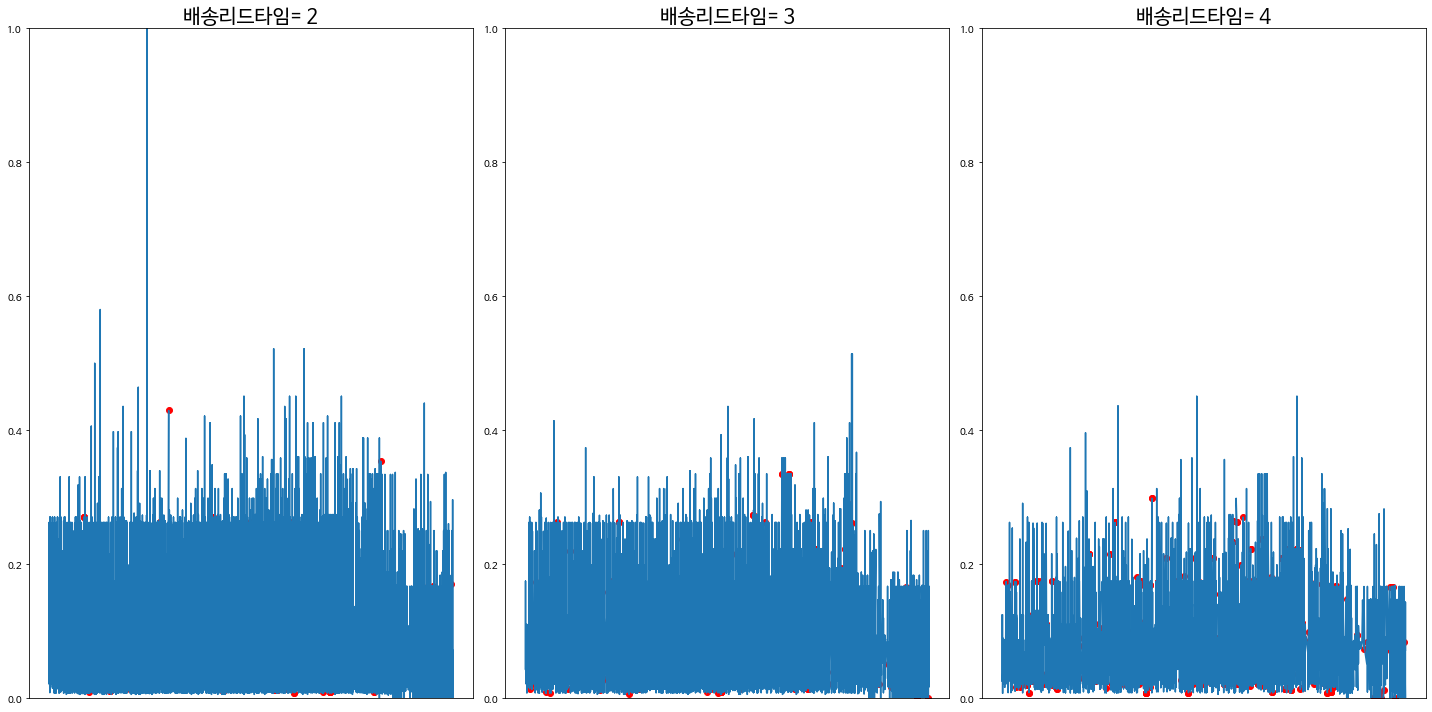

In [ ]:
# 배송리드타임에 따른 구매금액 추이 그래프 위에 이상치로 뽑은 날짜들을 표시
fig, axes = plt.subplots(1, 3, figsize = (20, 10))
axes = axes.ravel()

for idx, element in enumerate(zip(axes, group_leadtime)):
  axis, group = element
  store, df_majorsales_sort_index = group
  df_x = df_majorsales_sort_index["구매일"]
  df_y = df_majorsales_sort_index["구매금액"]
  outlier_x = outlier_date
  outlier_y = [df_majorsales_sort_index[df_majorsales_sort_index["구매일"] == i]["구매금액"].values[0] for i in outlier_date]

  axis.plot(df_x, df_y)
  axis.scatter(outlier_x, outlier_y, color = "red")
  
  axis.set_ylim([0, 1])
  axis.get_xaxis().set_visible(False)
  axis.set_title(f"배송리드타임= {idx+2}", fontsize = 20)

plt.tight_layout()
plt.show()

#### 시각화 분석 내용 정리

#### 배송리드타임에 따른 구매 금액을 그래프로 시각화함. 배송리드타임에 따른 구매금액 추세 시각화를 통하여 배송리드타임이 1일인 경우 비교적 많은 구매금액과 연관이 있음을 알 수 있다.
#### 구매금액의 변화량이 큰 부분을 찾아 이상치로 표시함. 배송리드타임이 3일인 경우, 구매금액의 이상치가 자주 발견되기에 배송리드타임이 길수록 불안정한 매출과 연관이 있음을 발견함.
#### 판매물품량이 가장 많은 기저귀, 팬티, 더블하트 3종류의 물품만 추출하여 시각화 분석한 결과 이상치가 더 많음을 파악할 수 있다.

## 숫자형 변수들간의 상관관계 분석

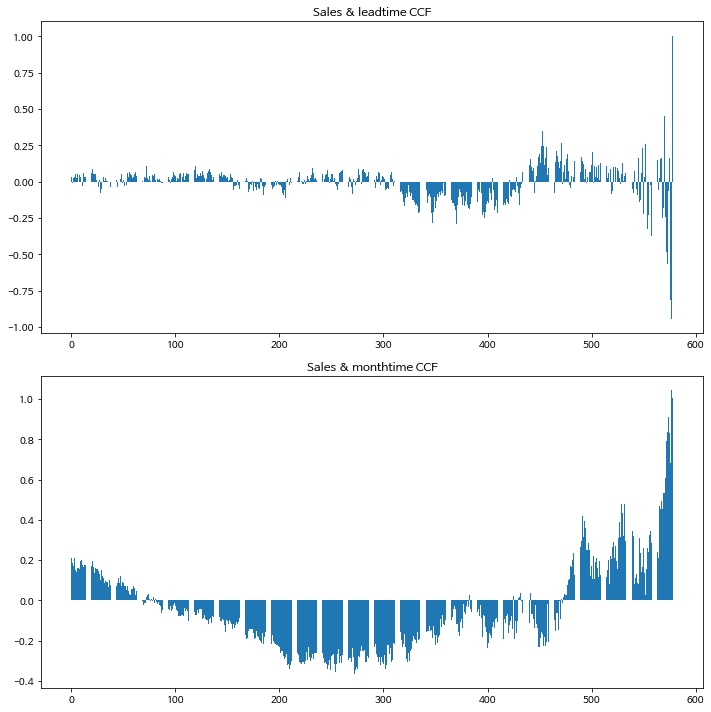

In [ ]:
import statsmodels.api as sm


numeric = data[["구매일", "배송리드타임", "구매시월령(수정)", "구매금액"]]
numeric = numeric.groupby("구매일").mean()

#calculate cross correlation
leadtime_ccf = sm.tsa.stattools.ccf(numeric["구매금액"], numeric["배송리드타임"])
monthtime_ccf = sm.tsa.stattools.ccf(numeric["구매금액"], numeric["구매시월령(수정)"])

fig, axes = plt.subplots(2,1, figsize = (10, 10))

axes[0].bar(list(range(len(leadtime_ccf))), leadtime_ccf)
axes[0].set_title("Sales & leadtime CCF")
axes[1].bar(list(range(len(monthtime_ccf))), monthtime_ccf)
axes[1].set_title("Sales & monthtime CCF")\

plt.tight_layout()
plt.show()

#### 숫자형 변수들과 매출액의 교차 상관관계를 시각화한 결과 다음과 같은 내용을 도출할 수 있었습니다.
#### 각 시점별로 0이 아닌 값을 가졌기 때문에 각 변수마다 매출액과 상관관계가 존재합니다.

### VAR(Vector Auto-Regression) - 벡터 자기회귀모형 분석

In [ ]:
from statsmodels.tsa.api import VAR

forecasting_model = VAR(numeric)
results_aic = []
for p in range(1,10):
  results = forecasting_model.fit(p)
  results_aic.append(results.aic)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


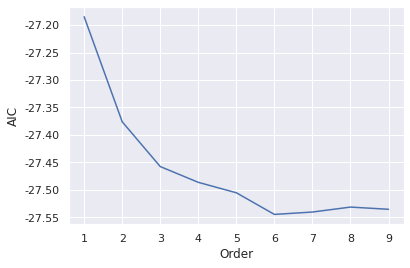

In [ ]:
# VAR 모델링 과정에서 최적의 모델을 찾기 위한 기준으로 AIC를 선택하였으며 AIC가 가장 낮은 순서(Order) p가 최적의 모델.
sns.set()
plt.plot(list(np.arange(1,10,1)), results_aic)
plt.xlabel("Order")
plt.ylabel("AIC")
plt.show()

In [ ]:
# 위의 그림을 통하여 최적의 모델을 찾기 위해서 AIC가 가장 낮은 값을 시각화시킨 결과 Order가 6인 지점이 가장 낮기에 p는 6를 사용합니다.
results = forecasting_model.fit(6)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 25, Aug, 2022
Time:                     22:37:54
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -27.1122
Nobs:                     573.000    HQIC:                  -27.3761
Log likelihood:           5509.48    FPE:                1.08994e-12
AIC:                     -27.5450    Det(Omega_mle):     9.88332e-13
--------------------------------------------------------------------
Results for equation 배송리드타임
                  coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------
const                0.169641         0.021539            7.876           0.000
L1.배송리드타임            0.054545         0.042044            1.297           0.195
L1.구매시월령(수정)        -0.322438         0.282908           -1.140

#### 판매량이 가장 많은 기저귀, 팬티, 더블하트를 대상으로 VAR 분석을 진행한 결과 위의 내용과 같이 나왔으며 내용을 정리하면 다음과 같습니다.

#### 구매금액 변수와 연관된 변수들 중에서 prob이 0.05보다 작아서 통계적으로 유의한 변수는 다음과 같습니다.
####  L3.구매시월령(수정)  : prob = 0.012 coef = 0.196874

####  해당 결과를 해석하면 다음과 같은 회귀식이 나옵니다.
####  구매금액 = 0.196874 * L3.구매시월령(수정)

####  위의 회귀식을 통하여 'L3.구매시월령(수정)'이 증가하면 판매량이 가장 많은 기저귀, 팬티, 더블하트의 구매금액도 상승한다는 결론을 얻게 됩니다.

## ARIMA

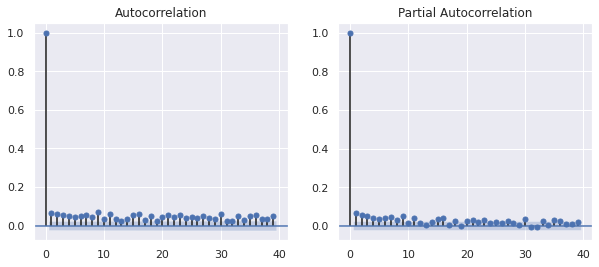

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

p,axes= plt.subplots(1,2,figsize=(10,4))
plot_acf(df_majorsales_sort_index['구매금액'],ax=axes[0]) #q=0
plot_pacf(df_majorsales_sort_index['구매금액'],ax=axes[1]) #p=1
plt.show()

In [ ]:
df_majorsales_sort_index['구매금액2']=df_majorsales_sort_index['구매금액'].diff(1) #1차분
df_majorsales_sort_index.head()

,구매일,배송리드타임,구매시월령(수정),구매금액,구매금액2
199975,2019-01-01,1.0,0.019097,0.025819,NaN
199982,2019-01-01,1.0,0.078125,0.124682,0.098863
199948,2019-01-02,1.0,0.032986,0.124682,0.000000
199901,2019-01-02,1.0,0.019097,0.025819,-0.098863
199927,2019-01-02,1.0,0.015625,0.007525,-0.018294


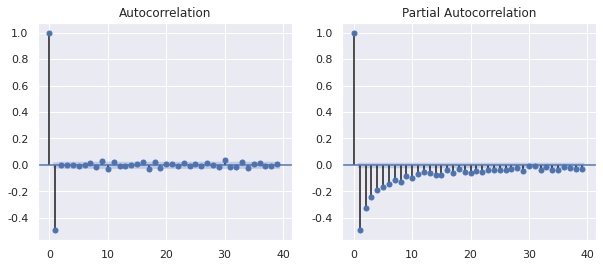

In [ ]:
p,axes= plt.subplots(1,2,figsize=(10,4))
plot_acf(df_majorsales_sort_index['구매금액2'].iloc[1:],ax=axes[0]) 
plot_pacf(df_majorsales_sort_index['구매금액2'].iloc[1:],ax=axes[1]) 
plt.show()

In [ ]:
# Summary
from statsmodels.tsa.arima_model import ARIMA

# (AR = 1, 차분 =1, MA=0) 파라미터로 ARIMA 모델을 학습한다.
model=ARIMA(df_majorsales_sort_index['구매금액2'].iloc[1:],order=(1,1,0))
fit_res=model.fit()
print(fit_res.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.구매금액2   No. Observations:                 6897
Model:                 ARIMA(1, 1, 0)   Log Likelihood                6270.996
Method:                       css-mle   S.D. of innovations              0.097
Date:                Thu, 25 Aug 2022   AIC                         -12535.992
Time:                        22:37:56   BIC                         -12515.476
Sample:                             1   HQIC                        -12528.917
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -9.544e-06      0.001     -0.014      0.989      -0.001       0.001
ar.L1.D.구매금액2    -0.6656      0.009    -74.061      0.000      -0.683      -0.648
                                    Root

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecastin

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50529 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_te

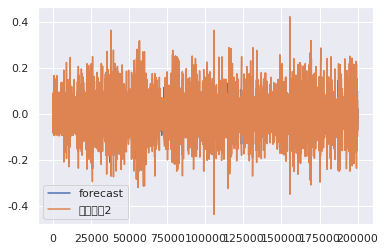

In [ ]:
#학습 데이터에 대한 예측 결과
fit_res.plot_predict()
#plt.figure(figsize = (10,4))
sns.set(rc={'figure.figsize':(6,4)})
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44050 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44284 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52769 missing from current font.
  font.set_

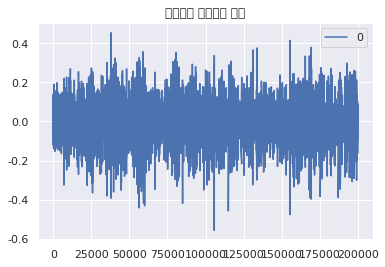

In [ ]:
residuals = pd.DataFrame(fit_res.resid)
residuals.plot(title = "실제값과 예측값의 잔차")